In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss, roc_curve, auc, precision_recall_curve
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
import time

# Must declare data_dir as the directory of training and test files
#data_dir="./datasets/KDD-CUP-99/"
#data_dir=""
raw_data_filename_test = 'D:\CMP-510 Resilient System\ML Datasets\MLwork\CMP510_testing_dataset.csv'
raw_data_filename_training = 'D:\CMP-510 Resilient System\ML Datasets\MLwork\CMP510_training_dataset.csv'

print ("Loading raw data")

raw_data_test = pd.read_csv(raw_data_filename_test, skiprows=1, header=None)
raw_data_test.info()
raw_data_training = pd.read_csv(raw_data_filename_training, skiprows=1, header=None)
raw_data_training.info()

Loading raw data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82327 entries, 0 to 82326
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       82327 non-null  float64
 1   1       82327 non-null  object 
 2   2       82327 non-null  object 
 3   3       82327 non-null  object 
 4   4       82327 non-null  int64  
 5   5       82327 non-null  int64  
 6   6       82327 non-null  int64  
 7   7       82327 non-null  int64  
 8   8       82327 non-null  float64
 9   9       82327 non-null  int64  
 10  10      82327 non-null  int64  
 11  11      82327 non-null  float64
 12  12      82327 non-null  float64
 13  13      82327 non-null  int64  
 14  14      82327 non-null  int64  
 15  15      82327 non-null  float64
 16  16      82327 non-null  float64
 17  17      82327 non-null  float64
 18  18      82327 non-null  float64
 19  19      82327 non-null  int64  
 20  20      82327 non-null  int64  
 21  21      82327 non-

In [2]:
print ("Transforming data")
# Categorize columns: "protocol", "service", "flag", "attack_type"
raw_data_test[1], protocols_test= pd.factorize(raw_data_test[1])
raw_data_test[2], services_test = pd.factorize(raw_data_test[2])
raw_data_test[3], flags_test    = pd.factorize(raw_data_test[3])
raw_data_test[42], attacks_test = pd.factorize(raw_data_test[42])

raw_data_training[1], protocols_training= pd.factorize(raw_data_training[1])
raw_data_training[2], services_training = pd.factorize(raw_data_training[2])
raw_data_training[3], flags_training    = pd.factorize(raw_data_training[3])
raw_data_training[42], attacks_training = pd.factorize(raw_data_training[42])

Transforming data


In [3]:
raw_data_test

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.000011,0,0,0,2,0,496,0,90909.090200,254,...,1,1,2,0,0,0,1,2,0,0
1,0.000008,0,0,0,2,0,1762,0,125000.000300,254,...,1,1,2,0,0,0,1,2,0,0
2,0.000005,0,0,0,2,0,1068,0,200000.005100,254,...,1,1,3,0,0,0,1,3,0,0
3,0.000006,0,0,0,2,0,900,0,166666.660800,254,...,2,1,3,0,0,0,2,3,0,0
4,0.000010,0,0,0,2,0,2126,0,100000.002500,254,...,2,1,3,0,0,0,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82322,0.000005,0,0,0,2,0,104,0,200000.005100,254,...,1,1,2,0,0,0,2,1,0,0
82323,1.106101,2,0,1,20,8,18062,354,24.410067,254,...,1,1,1,0,0,0,3,2,0,0
82324,0.000000,1,0,0,1,0,46,0,0.000000,0,...,1,1,1,0,0,0,1,1,1,0
82325,0.000000,1,0,0,1,0,46,0,0.000000,0,...,1,1,1,0,0,0,1,1,1,0


In [4]:
#X_test=pd.concat([raw_data_test,raw_data_training])

In [5]:
X_test=raw_data_test

In [6]:
 # separate features (columns 1..40) and label (column 41)
features_training= raw_data_training.iloc[:,:raw_data_training.shape[1]-1]
labels_training= raw_data_training.iloc[:,raw_data_training.shape[1]-1:]

features_test= raw_data_test.iloc[:,:raw_data_test.shape[1]-1]
labels_test= raw_data_test.iloc[:,raw_data_test.shape[1]-1:]


In [7]:
features_training

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.121478,0,0,0,6,4,258,172,74.087490,252,...,1,1,1,1,0,0,0,1,1,0
1,0.649902,0,0,0,14,38,734,42014,78.473372,62,...,1,1,1,2,0,0,0,1,6,0
2,1.623129,0,0,0,8,16,364,13186,14.170161,62,...,2,1,1,3,0,0,0,2,6,0
3,1.681642,0,1,0,12,12,628,770,13.677108,62,...,2,1,1,3,1,1,0,2,1,0
4,0.449454,0,0,0,10,6,534,268,33.373826,254,...,2,2,1,40,0,0,0,2,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,1,6,1,2,0,114,0,111111.107200,254,...,24,24,13,24,0,0,0,24,24,0
175337,0.505762,0,0,0,10,8,620,354,33.612649,254,...,1,1,1,2,0,0,0,1,1,0
175338,0.000009,1,6,1,2,0,114,0,111111.107200,254,...,3,3,3,13,0,0,0,3,12,0
175339,0.000009,1,6,1,2,0,114,0,111111.107200,254,...,30,30,14,30,0,0,0,30,30,0


In [8]:
labels_test= labels_test.values.ravel()

In [9]:
labels_training=labels_training.values.ravel()

In [10]:
labels_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
labels_training

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

In [12]:
df_test= pd.DataFrame(features_test)
df_test

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.000011,0,0,0,2,0,496,0,90909.090200,254,...,1,1,1,2,0,0,0,1,2,0
1,0.000008,0,0,0,2,0,1762,0,125000.000300,254,...,1,1,1,2,0,0,0,1,2,0
2,0.000005,0,0,0,2,0,1068,0,200000.005100,254,...,1,1,1,3,0,0,0,1,3,0
3,0.000006,0,0,0,2,0,900,0,166666.660800,254,...,2,2,1,3,0,0,0,2,3,0
4,0.000010,0,0,0,2,0,2126,0,100000.002500,254,...,2,2,1,3,0,0,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82322,0.000005,0,0,0,2,0,104,0,200000.005100,254,...,2,1,1,2,0,0,0,2,1,0
82323,1.106101,2,0,1,20,8,18062,354,24.410067,254,...,2,1,1,1,0,0,0,3,2,0
82324,0.000000,1,0,0,1,0,46,0,0.000000,0,...,1,1,1,1,0,0,0,1,1,1
82325,0.000000,1,0,0,1,0,46,0,0.000000,0,...,1,1,1,1,0,0,0,1,1,1


In [13]:
df_training= pd.DataFrame(features_training)
df_training

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.121478,0,0,0,6,4,258,172,74.087490,252,...,1,1,1,1,0,0,0,1,1,0
1,0.649902,0,0,0,14,38,734,42014,78.473372,62,...,1,1,1,2,0,0,0,1,6,0
2,1.623129,0,0,0,8,16,364,13186,14.170161,62,...,2,1,1,3,0,0,0,2,6,0
3,1.681642,0,1,0,12,12,628,770,13.677108,62,...,2,1,1,3,1,1,0,2,1,0
4,0.449454,0,0,0,10,6,534,268,33.373826,254,...,2,2,1,40,0,0,0,2,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,1,6,1,2,0,114,0,111111.107200,254,...,24,24,13,24,0,0,0,24,24,0
175337,0.505762,0,0,0,10,8,620,354,33.612649,254,...,1,1,1,2,0,0,0,1,1,0
175338,0.000009,1,6,1,2,0,114,0,111111.107200,254,...,3,3,3,13,0,0,0,3,12,0
175339,0.000009,1,6,1,2,0,114,0,111111.107200,254,...,30,30,14,30,0,0,0,30,30,0


In [14]:
X_train=df_training
y_train=labels_training
X_test =df_test
y_test = labels_test

In [15]:
#X_train, X_test, y_train, y_test = train_test_split(df_test, labels_test, test_size=0.33, random_state=1)

In [16]:
from sklearn.tree import DecisionTreeClassifier
print ("Training model")
#clf= MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=True, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)
clf= DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=40, min_samples_leaf=5)
#trained_model= clf.fit(X_train, y_train)
trained_model_DT= clf.fit(X_train, y_train)
#print ("Score: ", trained_model.score(X_train, y_train))

Training model


In [17]:
print ("Predicting")
y_pred = clf.predict(X_test)
y_probabilities = clf.predict_proba(X_test)

Predicting


In [18]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_pred)

0.581267384940542

In [19]:
print("Train Accuracy: ", trained_model_DT.score(X_train, y_train))
print("Test Accuracy: ", trained_model_DT.score(X_test,y_test))
print("F1 Score: ", f1_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))

Train Accuracy:  0.8732926126804341
Test Accuracy:  0.581267384940542
F1 Score:  0.204479790969153
Recall:  0.22678952063454022
Precision:  0.23457013948651273


In [20]:
print ("Computing performance metrics")
results = confusion_matrix(y_test, y_pred, labels=[i for i in range(len(attacks_training))])
error = zero_one_loss(y_test, y_pred)

Computing performance metrics


Error:  0.418732615059458


C:\Users\urvas\AppData\Local\Temp/ipykernel_28148/1695579453.py:8: RuntimeWarning: divide by zero encountered in log
  im = ax.imshow(np.log(results), cmap='viridis', interpolation='nearest')


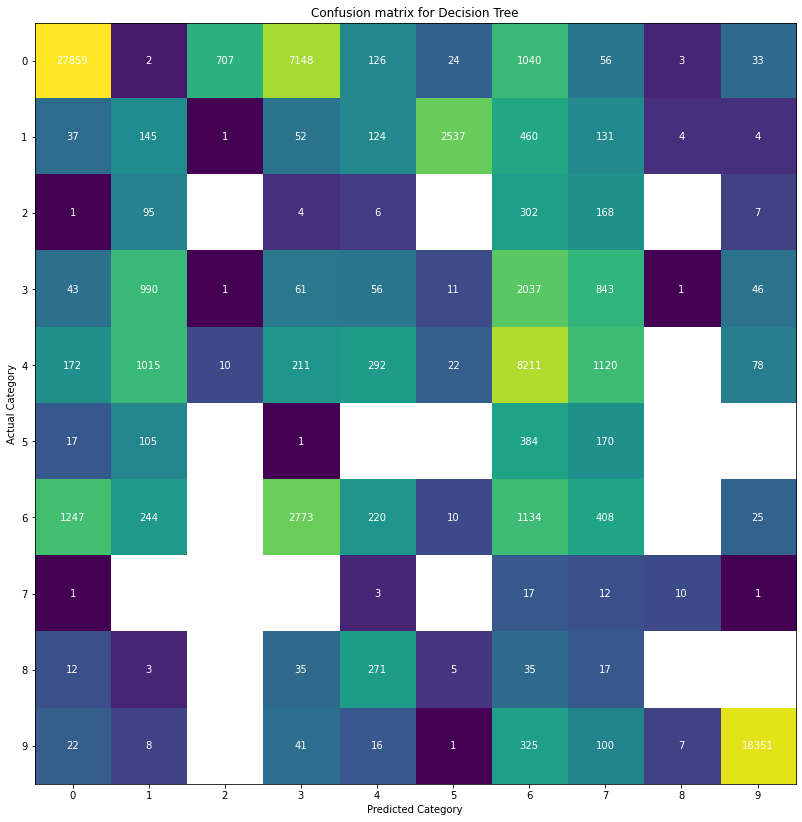

In [21]:
# By definition, entry i,j in a confusion matrix is the number of observations actually in group i, but predicted to be in group j
#print ("Confusion matrix:\n", results)
print ("Error: ", error)

# Visualize confusion matrix
n_groups = results.shape[0]
fig, ax = plt.subplots(figsize=(14,14))
im = ax.imshow(np.log(results), cmap='viridis', interpolation='nearest')
ax.set_xlabel('Predicted Category') #note that the x-axis shows the columns (j) of the matrix (i,j)
ax.set_ylabel('Actual Category') #note that the y-axis shows the rows (i) of the matrix (i,j)
ax.set_xticks(np.arange(n_groups))
ax.set_yticks(np.arange(n_groups))
ax.set_xticklabels(np.arange(n_groups))
ax.set_yticklabels(np.arange(n_groups))
# Loop over data dimensions and create text annotations.
for i in range(n_groups):
    for j in range(n_groups):
        text = ax.text(j, i, results[i, j], #note that the x-axis shows the columns (j) of the matrix (i,j)
                       ha="center", va="center", color="w")
ax.set_title('Confusion matrix for Decision Tree')
fig.savefig('Confusion matrix for Decision Tree.png')
plt.show()

In [22]:
# Plot Receiver Operating Characteristic (ROC) and Precision-Recall Curves
# Convert classification output to 0 for normal and 1 for attacks of any kind
y_test_binary = []
y_score = []
for n in range(len(y_test)):
    label = y_test[n]
    y_score.append(sum(y_probabilities[n,:])-y_probabilities[n,0]) #sum probabilities of all attack categories excluding normal
    if attacks_training[label] == 'Normal':
        assert (label == 0) #check that the label for normal is 0
        y_test_binary.append(0)
    else:
        y_test_binary.append(1)
y_test_binary = np.array(y_test_binary)
y_score = np.array(y_score)

fpr, tpr, thresholds = roc_curve(y_test_binary, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)
precision, recall, thresholds_precision_recall = precision_recall_curve(y_test_binary, y_score, pos_label=1)
auc_pr = auc(recall, precision)

In [23]:
auc_pr

0.9282843005179913

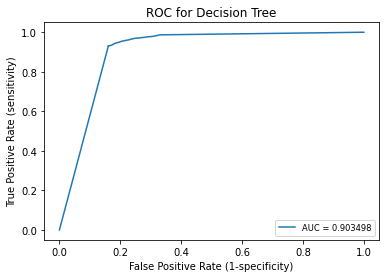

In [24]:
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.6f' % (roc_auc))
plt.xlabel('False Positive Rate (1-specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.title('ROC for Decision Tree')
plt.legend(loc="lower right", prop={'size': 'small'})
plt.savefig('ROC curve for Decision Tree.png')
plt.savefig('ROC curve for Decision Tree.pdf')
plt.show()

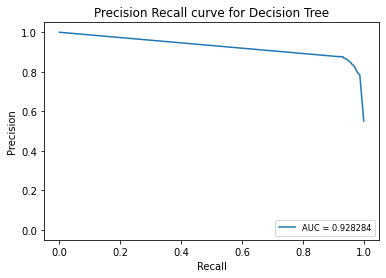

In [25]:
plt.figure()
plt.plot(recall, precision, label='AUC = %0.6f' % (auc_pr))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.title('Precision Recall curve for Decision Tree')
plt.legend(loc="lower right", prop={'size': 'small'})
plt.savefig('Precision Recall curve for Decision tree.png')
plt.savefig('Precision Recall curve for Decision Tree.pdf')
plt.show()

# MLP

In [26]:
print ("Training model")
clf= MLPClassifier(hidden_layer_sizes=(90,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=True, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)
trained_model= clf.fit(X_train, y_train)

#print ("Score: ", trained_model.score(X_train, y_train))

Training model
Iteration 1, loss = 21.82010665
Iteration 2, loss = 20.09306501
Iteration 3, loss = 19.45878700
Iteration 4, loss = 18.95024603
Iteration 5, loss = 19.05045160
Iteration 6, loss = 18.75693916
Iteration 7, loss = 18.67900139
Iteration 8, loss = 18.58772338
Iteration 9, loss = 18.16304269
Iteration 10, loss = 18.30506735
Iteration 11, loss = 18.26472390
Iteration 12, loss = 18.19633862
Iteration 13, loss = 18.12255455
Iteration 14, loss = 18.10428080
Iteration 15, loss = 17.95514178
Iteration 16, loss = 17.85320767
Iteration 17, loss = 17.69222896
Iteration 18, loss = 17.83542758
Iteration 19, loss = 17.39390906
Iteration 20, loss = 17.72943844
Iteration 21, loss = 17.58839134
Iteration 22, loss = 17.79738910
Iteration 23, loss = 17.37942362
Iteration 24, loss = 17.50123150
Iteration 25, loss = 17.37326910
Iteration 26, loss = 17.43755670
Iteration 27, loss = 17.23209105
Iteration 28, loss = 17.21880145
Iteration 29, loss = 17.27956209
Iteration 30, loss = 17.28849548
Iter

In [27]:
print ("Predicting")
y_pred = clf.predict(X_test)
y_probabilities = clf.predict_proba(X_test)

Predicting


In [28]:
#Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.4882359371773537

In [29]:
print("Train Accuracy: ", trained_model.score(X_train, y_train))
print("Test Accuracy: ", trained_model.score(X_test,y_test))
print("F1 Score: ", f1_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))

Train Accuracy:  0.4557576379740049
Test Accuracy:  0.4882359371773537
F1 Score:  0.15330612652581674
Recall:  0.22655533306102998
Precision:  0.16932690207108325


In [30]:
print ("Computing performance metrics")
results = confusion_matrix(y_test, y_pred, labels=[i for i in range(len(attacks_training))])
error = zero_one_loss(y_test, y_pred)

Computing performance metrics


Error:  0.5117640628226463


C:\Users\urvas\AppData\Local\Temp/ipykernel_28148/2477245102.py:8: RuntimeWarning: divide by zero encountered in log
  im = ax.imshow(np.log(results), cmap='viridis', interpolation='nearest')


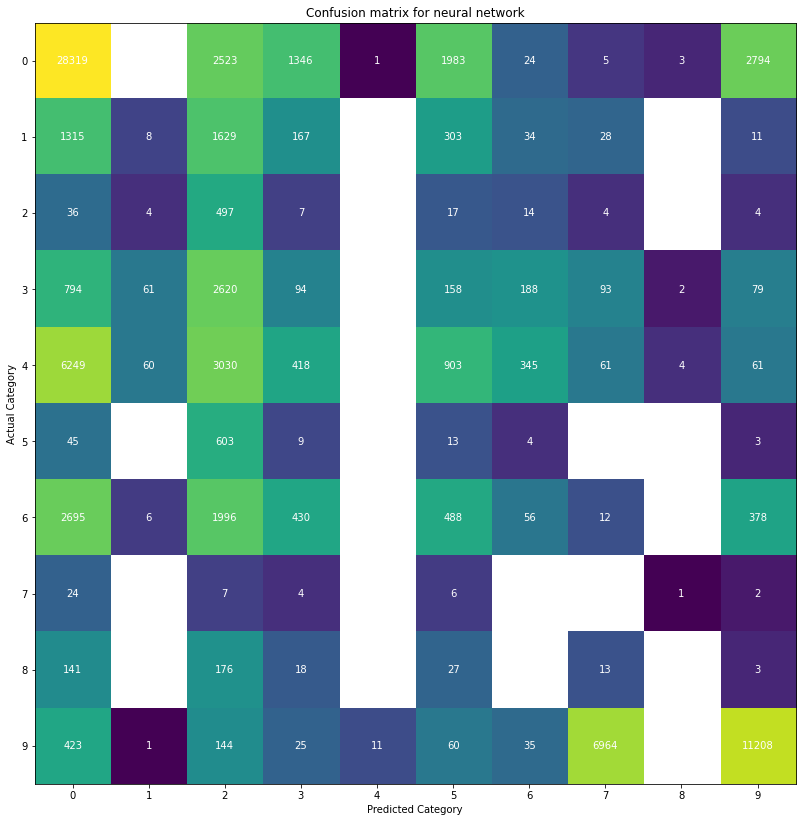

In [31]:
# By definition, entry i,j in a confusion matrix is the number of observations actually in group i, but predicted to be in group j
#print ("Confusion matrix:\n", results)
print ("Error: ", error)

# Visualize confusion matrix
n_groups = results.shape[0]
fig, ax = plt.subplots(figsize=(14,14))
im = ax.imshow(np.log(results), cmap='viridis', interpolation='nearest')
ax.set_xlabel('Predicted Category') #note that the x-axis shows the columns (j) of the matrix (i,j)
ax.set_ylabel('Actual Category') #note that the y-axis shows the rows (i) of the matrix (i,j)
ax.set_xticks(np.arange(n_groups))
ax.set_yticks(np.arange(n_groups))
ax.set_xticklabels(np.arange(n_groups))
ax.set_yticklabels(np.arange(n_groups))
# Loop over data dimensions and create text annotations.
for i in range(n_groups):
    for j in range(n_groups):
        text = ax.text(j, i, results[i, j], #note that the x-axis shows the columns (j) of the matrix (i,j)
                       ha="center", va="center", color="w")
ax.set_title('Confusion matrix for neural network')
fig.savefig('Confusion matrix for neural network.png')
plt.show()

In [32]:
# Plot Receiver Operating Characteristic (ROC) and Precision-Recall Curves
# Convert classification output to 0 for normal and 1 for attacks of any kind
y_test_binary = []
y_score = []
for n in range(len(y_test)):
    label = y_test[n]
    y_score.append(sum(y_probabilities[n,:])-y_probabilities[n,0]) #sum probabilities of all attack categories excluding normal
    if attacks_training[label] == 'Normal':
        assert (label == 0) #check that the label for normal is 0
        y_test_binary.append(0)
    else:
        y_test_binary.append(1)
y_test_binary = np.array(y_test_binary)
y_score = np.array(y_score)

fpr, tpr, thresholds = roc_curve(y_test_binary, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)
precision, recall, thresholds_precision_recall = precision_recall_curve(y_test_binary, y_score, pos_label=1)
auc_pr = auc(recall, precision)
auc_pr

0.8386261785761021

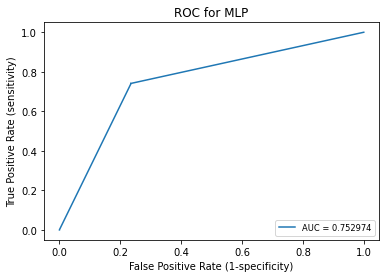

In [33]:
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.6f' % (roc_auc))
plt.xlabel('False Positive Rate (1-specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.title('ROC for MLP')
plt.legend(loc="lower right", prop={'size': 'small'})
plt.savefig('ROC curve for neural network.png')
plt.savefig('ROC curve for neural network.pdf')
plt.show()

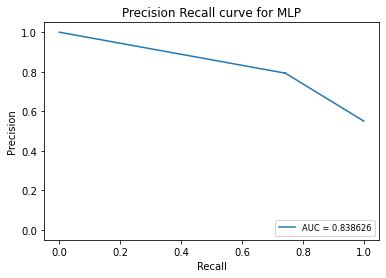

In [34]:
plt.figure()
plt.plot(recall, precision, label='AUC = %0.6f' % (auc_pr))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.title('Precision Recall curve for MLP')
plt.legend(loc="lower right", prop={'size': 'small'})
plt.savefig('Precision Recall curve for neural network.png')
plt.savefig('Precision Recall curve for neural network.pdf')
plt.show()

# Random Forest Classifier

In [35]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix # will plot the confusion matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])



In [36]:
%%time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier(n_estimators=10,n_jobs=-1,random_state=40,bootstrap=True).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()


Wall time: 1.35 s


In [37]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
print("Train Accuracy: ", model.score(X_train, y_train))
print("Test Accuracy: ", model.score(X_test,y_test))
print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Train Accuracy:  0.9034680993036426
Test Accuracy:  0.5957340848081432
Accuracy: 59.57%
Recall: 59.57%
Precision: 67.91%
F1-Score: 62.53%
time to train: 1.21 s
time to predict: 0.08 s
total: 1.29 s


In [38]:
print ("Computing performance metrics")
results = confusion_matrix(y_test, y_predictions, labels=[i for i in range(len(attacks_training))])
error = zero_one_loss(y_test, y_predictions)

Computing performance metrics


Error:  0.40426591519185684


C:\Users\urvas\AppData\Local\Temp/ipykernel_28148/689291897.py:12: RuntimeWarning: divide by zero encountered in log
  im = ax.imshow(np.log(results), cmap='viridis', interpolation='nearest')


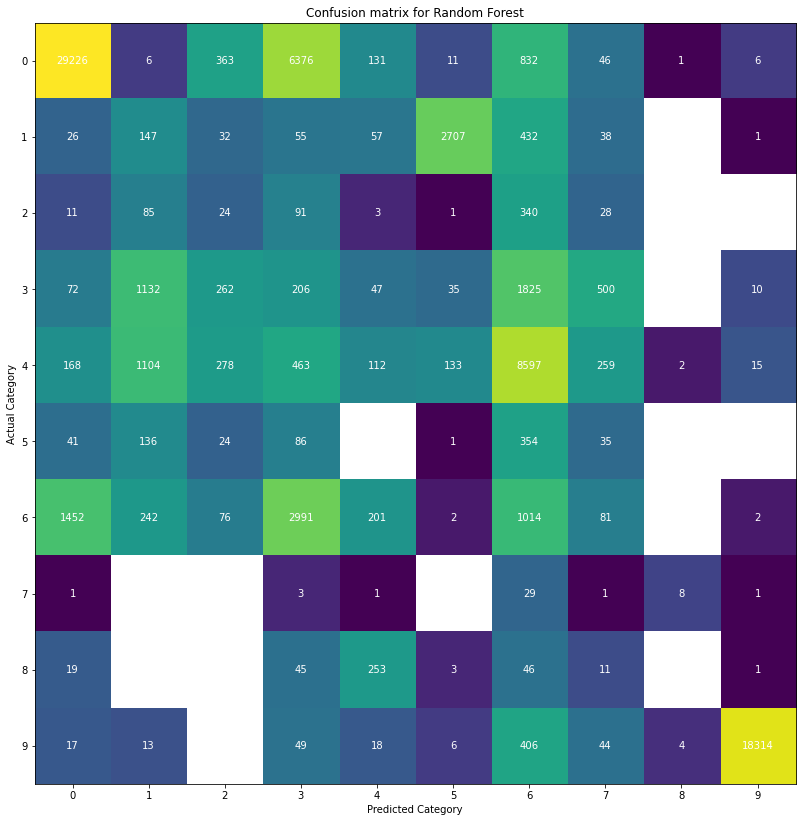

In [39]:
# print ("Computing performance metrics")
# results = confusion_matrix(y_test, y_predictions, labels=[i for i in range(len(attacks_training))])
# error = zero_one_loss(y_test, y_predictions)

# By definition, entry i,j in a confusion matrix is the number of observations actually in group i, but predicted to be in group j
#print ("Confusion matrix:\n", results)
print ("Error: ", error)

# Visualize confusion matrix
n_groups = results.shape[0]
fig, ax = plt.subplots(figsize=(14,14))
im = ax.imshow(np.log(results), cmap='viridis', interpolation='nearest')
ax.set_xlabel('Predicted Category') #note that the x-axis shows the columns (j) of the matrix (i,j)
ax.set_ylabel('Actual Category') #note that the y-axis shows the rows (i) of the matrix (i,j)
ax.set_xticks(np.arange(n_groups))
ax.set_yticks(np.arange(n_groups))
ax.set_xticklabels(np.arange(n_groups))
ax.set_yticklabels(np.arange(n_groups))
# Loop over data dimensions and create text annotations.
for i in range(n_groups):
    for j in range(n_groups):
        text = ax.text(j, i, results[i, j], #note that the x-axis shows the columns (j) of the matrix (i,j)
                       ha="center", va="center", color="w")
ax.set_title('Confusion matrix for Random Forest')
fig.savefig('Confusion matrix for Random Forest.png')
plt.show()

In [40]:
# Plot Receiver Operating Characteristic (ROC) and Precision-Recall Curves
# Convert classification output to 0 for normal and 1 for attacks of any kind
y_test_binary = []
y_score = []
for n in range(len(y_test)):
    label = y_test[n]
    y_score.append(sum(y_probabilities[n,:])-y_probabilities[n,0]) #sum probabilities of all attack categories excluding normal
    if attacks_training[label] == 'Normal':
        assert (label == 0) #check that the label for normal is 0
        y_test_binary.append(0)
    else:
        y_test_binary.append(1)
y_test_binary = np.array(y_test_binary)
y_score = np.array(y_score)

fpr, tpr, thresholds = roc_curve(y_test_binary, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)
precision, recall, thresholds_precision_recall = precision_recall_curve(y_test_binary, y_score, pos_label=1)
auc_pr = auc(recall, precision)

In [41]:
auc_pr

0.8386261785761021

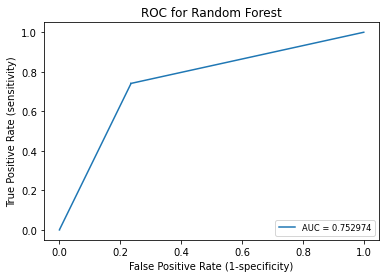

In [42]:
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.6f' % (roc_auc))
plt.xlabel('False Positive Rate (1-specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.title('ROC for Random Forest')
plt.legend(loc="lower right", prop={'size': 'small'})
plt.savefig('ROC curve for Random Forest.png')
plt.savefig('ROC curve for Random Forest.pdf')
plt.show()

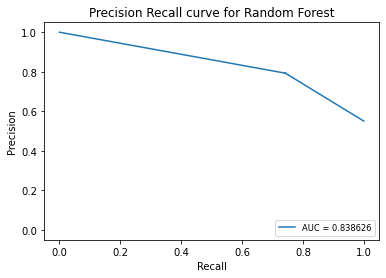

In [43]:
plt.figure()
plt.plot(recall, precision, label='AUC = %0.6f' % (auc_pr))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.title('Precision Recall curve for Random Forest')
plt.legend(loc="lower right", prop={'size': 'small'})
plt.savefig('Precision Recall curve for Random Forest.png')
plt.savefig('Precision Recall curve for Random Forest.pdf')
plt.show()